In [ ]:
import os
import numpy as np
import re
import csv
from tqdm import tqdm

from pathlib import Path
from PIL import Image, ImageOps

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Courses/COMS 4995-12 - Intro to DataViz/Assignments/A5/Scripts/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extracting data locations and data verification

In [ ]:
#file_aud = './Data/frame_audio_df_updated.csv'
#file_aud = '../audio_data/frame_audio_df_layified.csv'
file_aud = '../Final Audio Data/FINAL_frame_audio_layified.csv'
file_pic = './Data/palettes-dataframe.csv' 

In [ ]:
df_aud = pd.read_csv(file_aud)
df_aud = df_aud.drop(df_aud[df_aud['Category'] == 'Nonsense'].index)
df_aud = df_aud.rename(columns={'Category': 'Episode'}) 

df_aud = df_aud[['Episode', 'Frame','bpm','bass volume','low midrange volume','high midrange volume','treble volume','average overall loudness']]
#df_aud = df_aud[['Episode', 'Frame','dissonance','melbands_crest','melbands_flatness_db','pitch_salience','spectral_centroid','Estimated BPM']]

num_aud = df_aud.shape[1]-2

In [ ]:
df_pic = pd.read_csv(file_pic)

episodes = df_pic['Episode'].unique()
print(episodes)

encoder = LabelEncoder()
encoder.fit(episodes)
numerical_categories = encoder.transform(episodes)
episode_dict = dict(zip(episodes, numerical_categories)) 
print(episode_dict)

count_pic = df_pic['Episode'].value_counts()
print(count_pic)

['Bliss' 'Conflict' 'Coping' 'Death' 'Dreams' 'Family' 'Love' 'Nightmares'
 'Paradise']
{'Bliss': 0, 'Conflict': 1, 'Coping': 2, 'Death': 3, 'Dreams': 4, 'Family': 5, 'Love': 6, 'Nightmares': 7, 'Paradise': 8}
Coping        138
Dreams        138
Family        135
Love          135
Paradise      135
Nightmares    133
Bliss         131
Conflict      130
Death         130
Name: Episode, dtype: int64


In [ ]:
df_pic['Episode'].iloc[0]

'Bliss'

In [ ]:
load_palette = 1
if load_palette == 1:
  arr_df = pd.read_csv('./output/palette_info_mid.csv') 
else:
  #Reading palette info
  dir_pic = '../Frames and Palettes/'
  palette_info = []
  for i in range(len(df_pic)):
    img = Image.open(dir_pic + df_pic['Episode'].iloc[i] + ' frames/' + df_pic['Episode'].iloc[i] + ' Palettes/palette-frame' + str(df_pic['Frame'].iloc[i]) + '.png').convert('RGB')
    img2 = np.asarray(img)
    palette_info.append([img2[216,111,0], img2[216,111,1], img2[216,111,2], img2[216,220,0], img2[216,220,1], img2[216,220,2], img2[216,330,0], img2[216,330,1], img2[216,330,2]])
  arr_df = pd.DataFrame(palette_info, columns=['R1', 'G1', 'B1','R2', 'G2', 'B2','R3', 'G3', 'B3'])
  arr_df.to_csv('./output/palette_info_mid.csv',index=False)

df_pic = pd.concat([df_pic, arr_df], axis=1)
  

In [ ]:
import colorsys

# Define a function to apply the colorname_to_hsv function to each row of the DataFrame
def get_hsv(row):
    hsv1 = colorsys.rgb_to_hsv(row['R1'], row['G1'], row['B1'])
    hsv2 = colorsys.rgb_to_hsv(row['R2'], row['G2'], row['B2'])
    hsv3 = colorsys.rgb_to_hsv(row['R3'], row['G3'], row['B3'])
    return pd.Series(list(hsv1) + list(hsv2) + list(hsv3))

# Apply the get_hsv function to the DataFrame and create new columns for the HSV values
df_pic[['hue1', 'saturation1', 'value1', 'hue2', 'saturation2', 'value2', 'hue3', 'saturation3', 'value3']] = df_pic.apply(get_hsv, axis=1)

df_pic = df_pic.drop(columns = ['ID','Colour 1','Colour 2','Colour 3','R1','G1','B1','R2','G2','B2','R3','G3','B3'])

List of colors: ['black' 'brown' 'beige' 'pink' 'yellow' 'grey' 'green' 'purple' 'white' 'blue' 'lilac' 'orange' 'maroon' 'red']


In [ ]:
df_aud

,Episode,Frame,bpm,bass volume,low midrange volume,high midrange volume,treble volume,average overall loudness
0,Coping,0,103.0,0.001735,0.001170,0.000891,0.000518,0.001464
1,Coping,1,104.0,0.019130,0.006996,0.001789,0.000393,0.004067
2,Coping,2,104.0,0.022049,0.007433,0.001746,0.000514,0.004185
3,Coping,3,104.0,0.022124,0.007177,0.002074,0.000667,0.004267
4,Coping,4,103.0,0.024717,0.004034,0.001437,0.000192,0.003548
...,...,...,...,...,...,...,...,...
1202,Love,130,166.0,0.018372,0.017634,0.003170,0.000362,0.005637
1203,Love,131,166.0,0.013797,0.019678,0.003814,0.000441,0.005666
1204,Love,132,166.0,0.009241,0.011220,0.000753,0.000035,0.003626
1205,Love,133,155.0,0.002560,0.001721,0.002831,0.000295,0.002249


In [ ]:
df_pic

,Episode,Frame,hue1,saturation1,value1,hue2,saturation2,value2,hue3,saturation3,value3
0,Bliss,0,0.916667,1.000000,2.0,0.083333,0.800000,5.0,0.916667,0.500000,4.0
1,Bliss,1,0.048148,0.523256,86.0,0.061508,0.400000,210.0,0.053571,0.518519,162.0
2,Bliss,2,0.056863,0.527950,161.0,0.050725,0.534884,86.0,0.062016,0.403756,213.0
3,Bliss,3,0.060784,0.399061,213.0,0.048611,0.551724,87.0,0.054902,0.524691,162.0
4,Bliss,4,0.054054,0.493333,150.0,0.056225,0.458564,181.0,0.050847,0.522124,113.0
...,...,...,...,...,...,...,...,...,...,...,...
1200,Paradise,130,0.078616,0.595506,178.0,0.066667,0.573770,61.0,0.657407,0.091371,197.0
1201,Paradise,131,0.079580,0.627119,177.0,0.055556,0.555556,54.0,0.840000,0.109170,229.0
1202,Paradise,132,0.071839,0.644444,180.0,0.068182,0.637681,69.0,0.011905,0.056000,250.0
1203,Paradise,133,0.259542,0.515748,254.0,0.433511,0.740157,254.0,0.092172,0.613953,215.0


In [ ]:
#Initialization
count_pic = df_pic['Episode'].value_counts()
count_aud = df_aud['Episode'].value_counts()

In [ ]:
print(count_aud)
print(count_pic)

Coping        138
Dreams        138
Paradise      136
Family        135
Love          135
Nightmares    133
Death         131
Bliss         131
Conflict      130
Name: Episode, dtype: int64
Coping        138
Dreams        138
Family        135
Love          135
Paradise      135
Nightmares    133
Bliss         131
Conflict      130
Death         130
Name: Episode, dtype: int64


In [ ]:
count_eps = np.minimum(count_pic, count_aud)
print(count_eps)
print(sum(count_eps))

Bliss         131
Conflict      130
Coping        138
Death         130
Dreams        138
Family        135
Love          135
Nightmares    133
Paradise      135
Name: Episode, dtype: int64
1205


In [ ]:
# Manually remove additional frames
r1 = df_aud[(df_aud['Episode'] == 'Paradise') & (df_aud['Frame'] == 135)]
r2 = df_aud[(df_aud['Episode'] == 'Death') & (df_aud['Frame'] == 130)]
print([r1.index, r2.index])
df_aud = df_aud.drop(index=r1.index)
df_aud = df_aud.drop(index=r2.index)


[Int64Index([], dtype='int64'), Int64Index([], dtype='int64')]


In [ ]:
count_aud = df_aud['Episode'].value_counts()
print(count_aud)

Coping        138
Dreams        138
Paradise      136
Family        135
Love          135
Nightmares    133
Death         131
Bliss         131
Conflict      130
Name: Episode, dtype: int64


## Data normalization and conversion

In [ ]:
df = pd.merge(df_aud, df_pic, on=['Frame', 'Episode'])

In [ ]:
df

,Episode,Frame,bpm,bass volume,low midrange volume,high midrange volume,treble volume,average overall loudness,hue1,saturation1,value1,hue2,saturation2,value2,hue3,saturation3,value3
0,Coping,0,103.0,0.001735,0.001170,0.000891,0.000518,0.001464,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,Coping,1,104.0,0.019130,0.006996,0.001789,0.000393,0.004067,0.155556,0.144231,104.0,0.491228,0.104972,181.0,0.119048,0.152174,46.0
2,Coping,2,104.0,0.022049,0.007433,0.001746,0.000514,0.004185,0.175926,0.202247,89.0,0.185185,0.107143,168.0,0.055556,0.272727,22.0
3,Coping,3,104.0,0.022124,0.007177,0.002074,0.000667,0.004267,0.536458,0.140351,228.0,0.205128,0.270833,48.0,0.333333,0.065041,123.0
4,Coping,4,103.0,0.024717,0.004034,0.001437,0.000192,0.003548,0.536458,0.140351,228.0,0.333333,0.065041,123.0,0.205128,0.270833,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,Love,130,166.0,0.018372,0.017634,0.003170,0.000362,0.005637,0.605263,0.703704,27.0,0.772727,0.340708,226.0,0.526316,0.213483,89.0
1203,Love,131,166.0,0.013797,0.019678,0.003814,0.000441,0.005666,0.405983,0.325000,120.0,0.674242,0.511628,43.0,0.825902,0.969136,162.0
1204,Love,132,166.0,0.009241,0.011220,0.000753,0.000035,0.003626,0.598039,0.250000,68.0,0.533333,0.137615,109.0,0.673913,0.534884,43.0
1205,Love,133,155.0,0.002560,0.001721,0.002831,0.000295,0.002249,0.583333,0.782609,23.0,0.465278,0.258065,93.0,0.722222,0.153191,235.0


In [ ]:
df_val = df.drop(columns = ['Episode','Frame'])
df_meta= df[['Episode','Frame']]

In [ ]:
episode_val = []
for i in range(len(df_meta)):
  episode_val.append(episode_dict[df_meta['Episode'].iloc[i]])
df_meta['Episode_val'] = episode_val
print(df_meta)

     Episode  Frame  Episode_val
0     Coping      0            2
1     Coping      1            2
2     Coping      2            2
3     Coping      3            2
4     Coping      4            2
...      ...    ...          ...
1202    Love    130            6
1203    Love    131            6
1204    Love    132            6
1205    Love    133            6
1206    Love    133            6

[1207 rows x 3 columns]


<ipython-input-33-70f6e3bcd3fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['Episode_val'] = episode_val


In [ ]:
# extract the mean and standard deviation
mean_vid = df_val.mean()
std_vid = df_val.std()
print(mean_vid)
print(std_vid)

bpm                         125.881524
bass volume                   0.015303
low midrange volume           0.011343
high midrange volume          0.004045
treble volume                 0.000698
average overall loudness      0.004712
hue1                          0.390995
saturation1                   0.331129
value1                      119.301574
hue2                          0.404360
saturation2                   0.324687
value2                      138.140017
hue3                          0.408410
saturation3                   0.342185
value3                      137.038111
dtype: float64
bpm                         36.506321
bass volume                  0.017168
low midrange volume          0.008105
high midrange volume         0.003956
treble volume                0.001003
average overall loudness     0.001831
hue1                         0.349527
saturation1                  0.277262
value1                      82.601554
hue2                         0.351323
saturation2         

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df_val)
scaler.fit(X)

StandardScaler()

## Perform PCA

In [ ]:
X_vid = X
X_aud = X[:,:num_aud]
X_pic = X[:,num_aud:]

In [ ]:
#Checking the strength of the eigenvalues
# Compute the covariance matrix
cov_mat = np.cov(X.T)

# Compute the eigenvalues
eig_vals = np.linalg.eigvals(cov_mat)

print("Eigenvalues contributions:")
print(eig_vals)
print(eig_vals/sum(eig_vals)*100)

Eigenvalues contributions:
[2.35783169 2.02089507 1.58493292 1.43777324 1.31275143 0.04245987
 1.08519352 0.9136113  0.7825667  0.75104303 0.6566033  0.45938221
 0.5665701  0.53226134 0.50856211]
[15.70585484 13.46147172 10.55746532  9.57721362  8.74442541  0.28283128
  7.22862958  6.08569579  5.21278894  5.00280524  4.37372871  3.06001073
  3.77400465  3.54546909  3.3876051 ]


In [ ]:
pca_vid = PCA(n_components=2)
Xvid_pca = pca_vid.fit_transform(X_vid)
df_Vidpca = pd.DataFrame(data=Xvid_pca, columns=['PC1_V', 'PC2_V'])

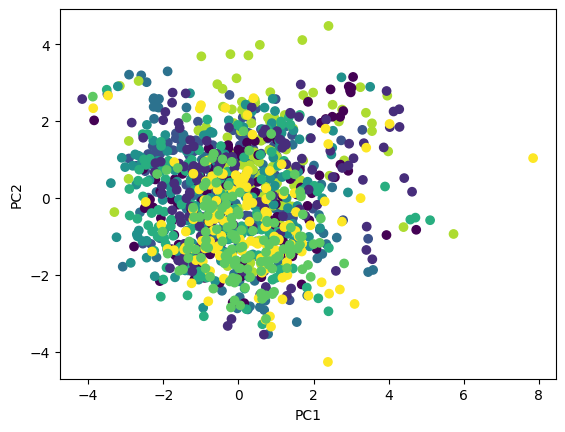

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_Vidpca['PC1_V'], df_Vidpca['PC2_V'], c=df_meta['Episode_val'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
pca_pic = PCA(n_components=2)
Xpic_pca = pca_pic.fit_transform(X_pic)
df_Picpca = pd.DataFrame(data=Xpic_pca, columns=['PC1_P', 'PC2_P'])

In [ ]:
X_pic.shape

(1207, 9)

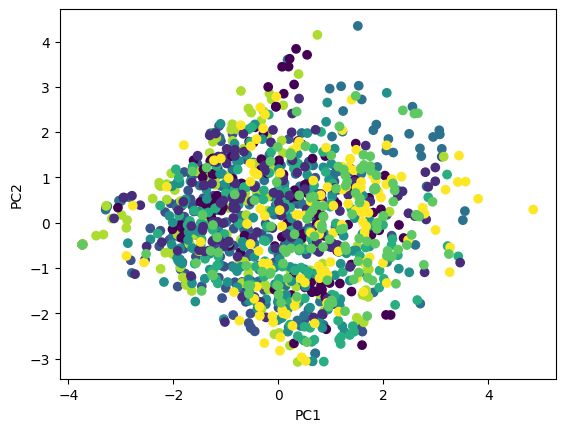

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_Picpca['PC1_P'], df_Picpca['PC2_P'], c=df_meta['Episode_val'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
pca_aud = PCA(n_components=2)
Xaud_pca = pca_aud.fit_transform(X_aud)
df_Audpca = pd.DataFrame(data=Xaud_pca, columns=['PC1_A', 'PC2_A'])

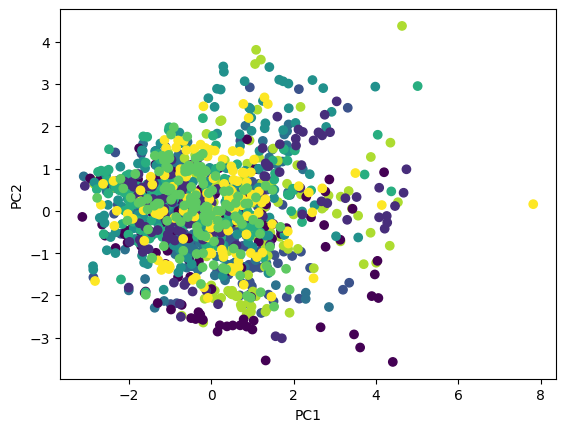

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_Audpca['PC1_A'], df_Audpca['PC2_A'], c=df_meta['Episode_val'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
pc_vid = pca_vid.components_
print(pc_vid)

[[ 0.03725097  0.44147093  0.36673537  0.32063495  0.2487687   0.59031541
   0.07679144  0.19727389  0.0198978   0.06192415  0.20050485  0.01173139
   0.07696203  0.20327863  0.13937871]
 [ 0.11563289  0.17740676  0.05702604  0.12298887  0.16966603  0.18392248
  -0.38981884 -0.27032585 -0.23259119 -0.40435343 -0.24980022 -0.15798234
  -0.44131894 -0.33631743 -0.19052049]]


In [ ]:
pc_pic = pca_pic.components_
print(pc_pic)

[[ 0.38445594  0.34821378  0.20823273  0.39348517  0.32397386  0.15747181
   0.42729961  0.40608673  0.23558761]
 [-0.29949341  0.51001559 -0.24238273 -0.38003844  0.22361987  0.30387626
  -0.37411256  0.40138436  0.05994127]]


In [ ]:
pc_aud = pca_aud.components_
print(pc_aud)

[[ 0.06177     0.48542562  0.38076527  0.35272101  0.29591363  0.63528517]
 [ 0.64841482 -0.31841839 -0.1495412   0.46210698  0.45113703 -0.19681945]]


In [ ]:
df_Vinfo = pd.DataFrame(data=np.vstack((pc_vid, mean_vid, std_vid)), 
                        index=['eig1', 'eig2', 'mean', 'std'])
print(df_Vinfo)

              0         1         2         3         4         5         6   \
eig1    0.037251  0.441471  0.366735  0.320635  0.248769  0.590315  0.076791   
eig2    0.115633  0.177407  0.057026  0.122989  0.169666  0.183922 -0.389819   
mean  125.881524  0.015303  0.011343  0.004045  0.000698  0.004712  0.390995   
std    36.506321  0.017168  0.008105  0.003956  0.001003  0.001831  0.349527   

            7           8         9         10          11        12  \
eig1  0.197274    0.019898  0.061924  0.200505    0.011731  0.076962   
eig2 -0.270326   -0.232591 -0.404353 -0.249800   -0.157982 -0.441319   
mean  0.331129  119.301574  0.404360  0.324687  138.140017  0.408410   
std   0.277262   82.601554  0.351323  0.272247   80.054539  0.359134   

            13          14  
eig1  0.203279    0.139379  
eig2 -0.336317   -0.190520  
mean  0.342185  137.038111  
std   0.268713   68.801769  


In [ ]:
df_Ainfo = pd.DataFrame(data=np.vstack((pc_aud, mean_vid[:num_aud], std_vid[:num_aud])), 
                        index=['eig1', 'eig2', 'mean', 'std'])
df_Ainfo.index = ['eig1', 'eig2', 'mean','std']
print(df_Ainfo)

               0         1         2         3         4         5
eig1    0.061770  0.485426  0.380765  0.352721  0.295914  0.635285
eig2    0.648415 -0.318418 -0.149541  0.462107  0.451137 -0.196819
mean  125.881524  0.015303  0.011343  0.004045  0.000698  0.004712
std    36.506321  0.017168  0.008105  0.003956  0.001003  0.001831


In [ ]:
df_Pinfo = pd.DataFrame(data=np.vstack((pc_pic, mean_vid[num_aud:], std_vid[num_aud:])), 
                        index=['eig1', 'eig2', 'mean', 'std'])
df_Pinfo.index = ['eig1', 'eig2', 'mean','std']
print(df_Pinfo)

             0         1           2         3         4           5  \
eig1  0.384456  0.348214    0.208233  0.393485  0.323974    0.157472   
eig2 -0.299493  0.510016   -0.242383 -0.380038  0.223620    0.303876   
mean  0.390995  0.331129  119.301574  0.404360  0.324687  138.140017   
std   0.349527  0.277262   82.601554  0.351323  0.272247   80.054539   

             6         7           8  
eig1  0.427300  0.406087    0.235588  
eig2 -0.374113  0.401384    0.059941  
mean  0.408410  0.342185  137.038111  
std   0.359134  0.268713   68.801769  


In [ ]:
df_Pinfo.to_csv('./output/Pic_PC2.csv',index=False)
df_Vinfo.to_csv('./output/Vid_PC2.csv',index=False)
df_Ainfo.to_csv('./output/Aud_PC2.csv',index=False)

## Create csv files to link to URL

In [ ]:
# eg: https://raw.githubusercontent.com/jf3482/DataViz-A5SampleImages/master/thumbnails/Bliss/frame105.png
base_link = 'https://raw.githubusercontent.com/jf3482/DataViz-A5SampleImages/master/'

In [ ]:
url_image = []
url_thumb = []
for i in range(len(df_meta)):
  url_image.append(base_link + 'image3b/' + df_meta['Episode'].iloc[i] + '/frame' + str(df_meta['Frame'].iloc[i]) + '.png')
  url_thumb.append(base_link + 'thumbnails2b/' + df_meta['Episode'].iloc[i] + '/frame' + str(df_meta['Frame'].iloc[i]) + '.png')

In [ ]:
df_meta['url_thumb'] = url_thumb
df_meta['url_image'] = url_image

<ipython-input-54-4423c6e5474b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['url_thumb'] = url_thumb
<ipython-input-54-4423c6e5474b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['url_image'] = url_image


## Combine all features into csv

In [ ]:
df_data = pd.DataFrame(X)

In [ ]:
df_combined = pd.concat([df_meta, df_data, df_Vidpca, df_Picpca, df_Audpca] ,axis=1) 

In [ ]:
df_combined.to_csv('./output/combined2.csv',index=False)